# Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
    
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df1=pd.read_csv("census_Income.csv")
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis

In [3]:
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df1.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df1.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11905,45,Local-gov,167334,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,>50K


In [6]:
df1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df1.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
# Checking Unique values

df1.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Checking Null Values

In [9]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

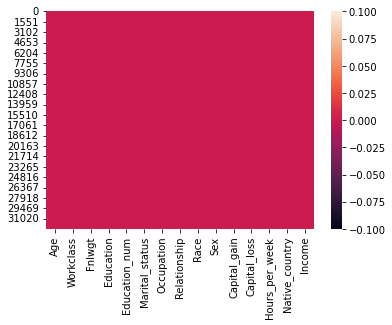

In [10]:
sns.heatmap(df1.isnull())

In [11]:
df1.isnull().sum().sum()

0

We don't have any null values in the dataset.

In [12]:
#Checking for empty observations
df1.loc[df1['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [13]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df1.columns:
        print(df1[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

So i can notice that there are some '?' entries in Workclass, Occupation and Native_country column.

So i have replace this '?' with the mode of the above columns.Since they are categorical columns.

In [14]:
# Checking Mode for Workclass column

df1["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

In [15]:
#Replacing '?' with mode value
df1['Workclass'] = df1.Workclass.str.replace('?', 'Private')

In [16]:
# Checking Mode for Occupation column

df1["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [17]:
#Replacing '?' with mode value
df1['Occupation'] = df1.Occupation.str.replace('?', 'Private')

In [18]:
# Checking Mode for Native_Country column

df1["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

In [19]:
#Replacing '?' with mode value
df1['Native_country'] = df1.Native_country.str.replace('?', 'Private')

In [20]:
#Checking the value count of Capital_gain column
df1["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In this perticular Capital_gain column there are 92% zero values so let me drop this column.

In [21]:
#Droping Capital_gain column
df1 = df1.drop(["Capital_gain"],axis=1)

In [22]:
#Checking the value count of Capital_loss column
df1["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In this perticular Capital_loss column there are 95% zero values so let me drop this column too.

In [23]:
#Droping Capital_loss column
df1 = df1.drop(["Capital_loss"],axis=1)

In [24]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


# Summary Statistics

In [25]:
df1.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


Describe method will be summary only for numerical columns by default.

Max is greater than 75th percentile in Age, Education_num, Hours_per_week.

# Visualization

In [26]:
# Separating categorical columns
categorical_columns=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns.

In [27]:
# Separating numerical columns
numerical_columns=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Above are the list of Numerical columns.

# Univariate Analysis

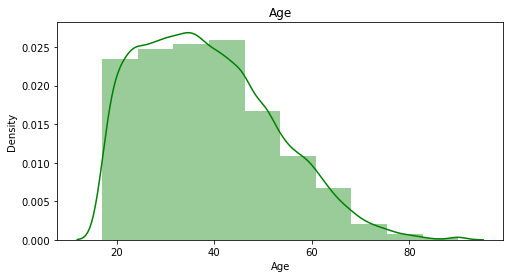

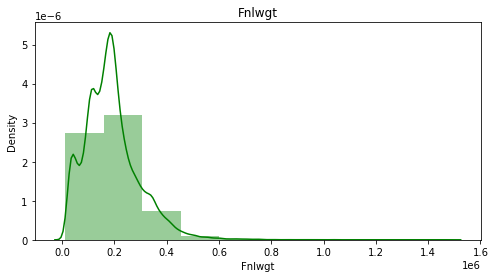

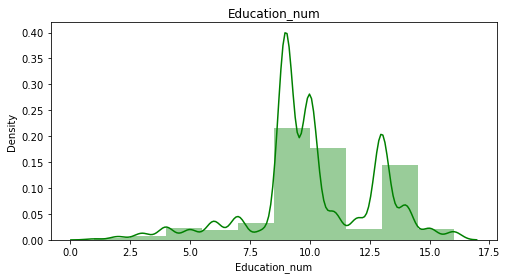

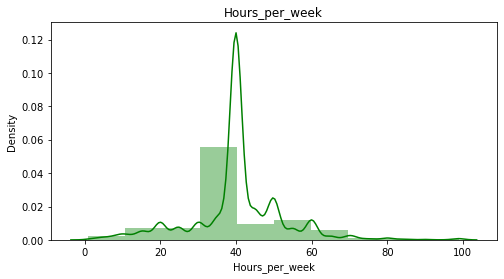

In [28]:
#Distribution plot for all numerical columns
for i in df1[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df1[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

All the numerical columns are skewed but skewness is less in case of Age.

<AxesSubplot:xlabel='Income', ylabel='count'>

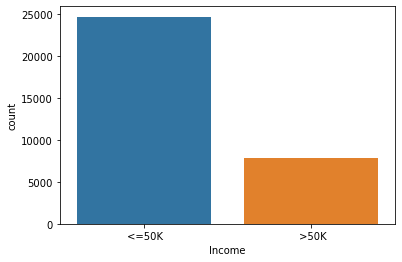

In [29]:
#Count plot for Income
sns.countplot(df1['Income'])

By looking into the count plot of target i can say that there is a data imbalancing issue.And also i can say that People with saalary >50k per year are very less.Most of the people are getting income below 50k per year.

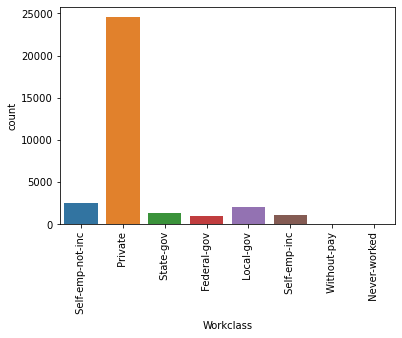

In [30]:
#Count plot for Workclass
sns.countplot(df1['Workclass'])
plt.xticks(rotation=90);

So maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

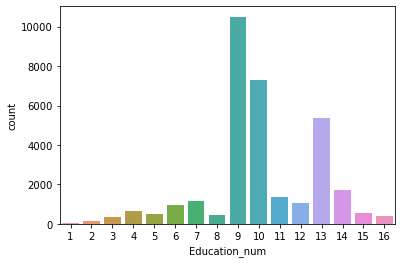

In [31]:
#Count plot for Education_num
sns.countplot(df1['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3.

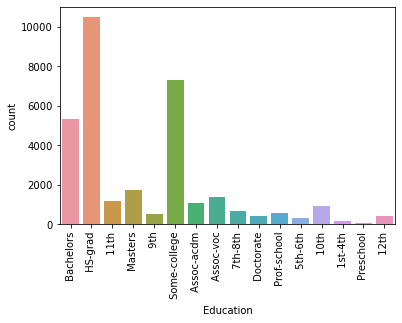

In [32]:
#Count plot for Education
sns.countplot(df1['Education'])
plt.xticks(rotation=90);

Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

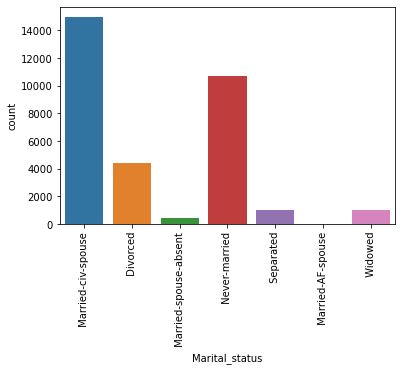

In [33]:
#Count plot for Marital_status
sns.countplot(df1['Marital_status'])
plt.xticks(rotation=90);

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

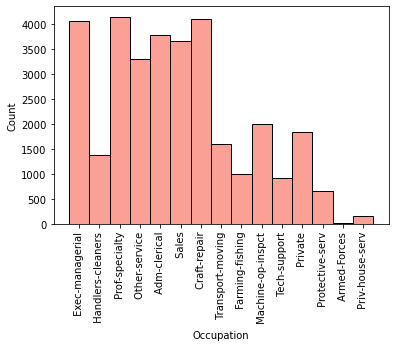

In [34]:
#Hist plot for Occupation
sns.histplot(df1['Occupation'],color='salmon')
plt.xticks(rotation=90);

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [35]:
#Checking the value count of Relationship column
df1["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

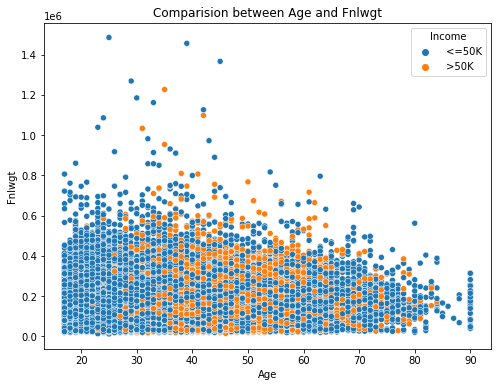

In [36]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df1['Age'],df1['Fnlwgt'],hue=df1["Income"]);

As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

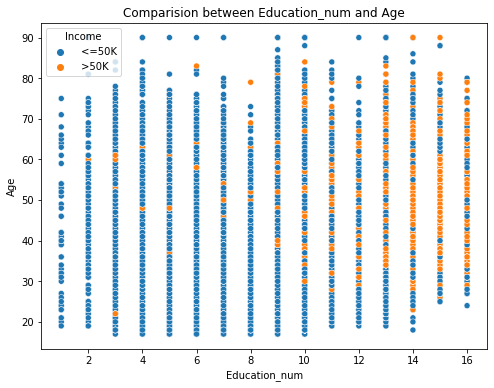

In [37]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df1['Education_num'],df1['Age'],hue=df1["Income"]);

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

# Multi-Variate Analysis

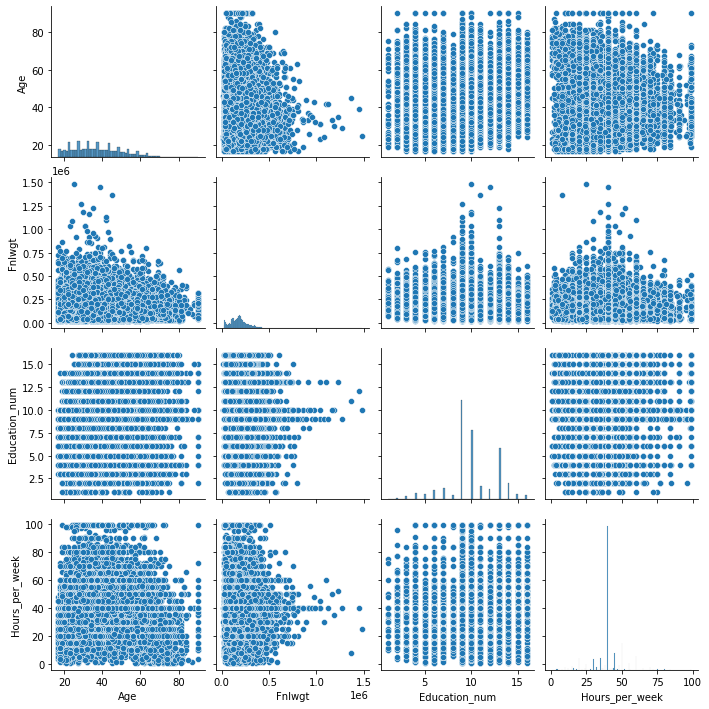

In [38]:
sns.pairplot(df1)

# Outliers Check

<AxesSubplot:>

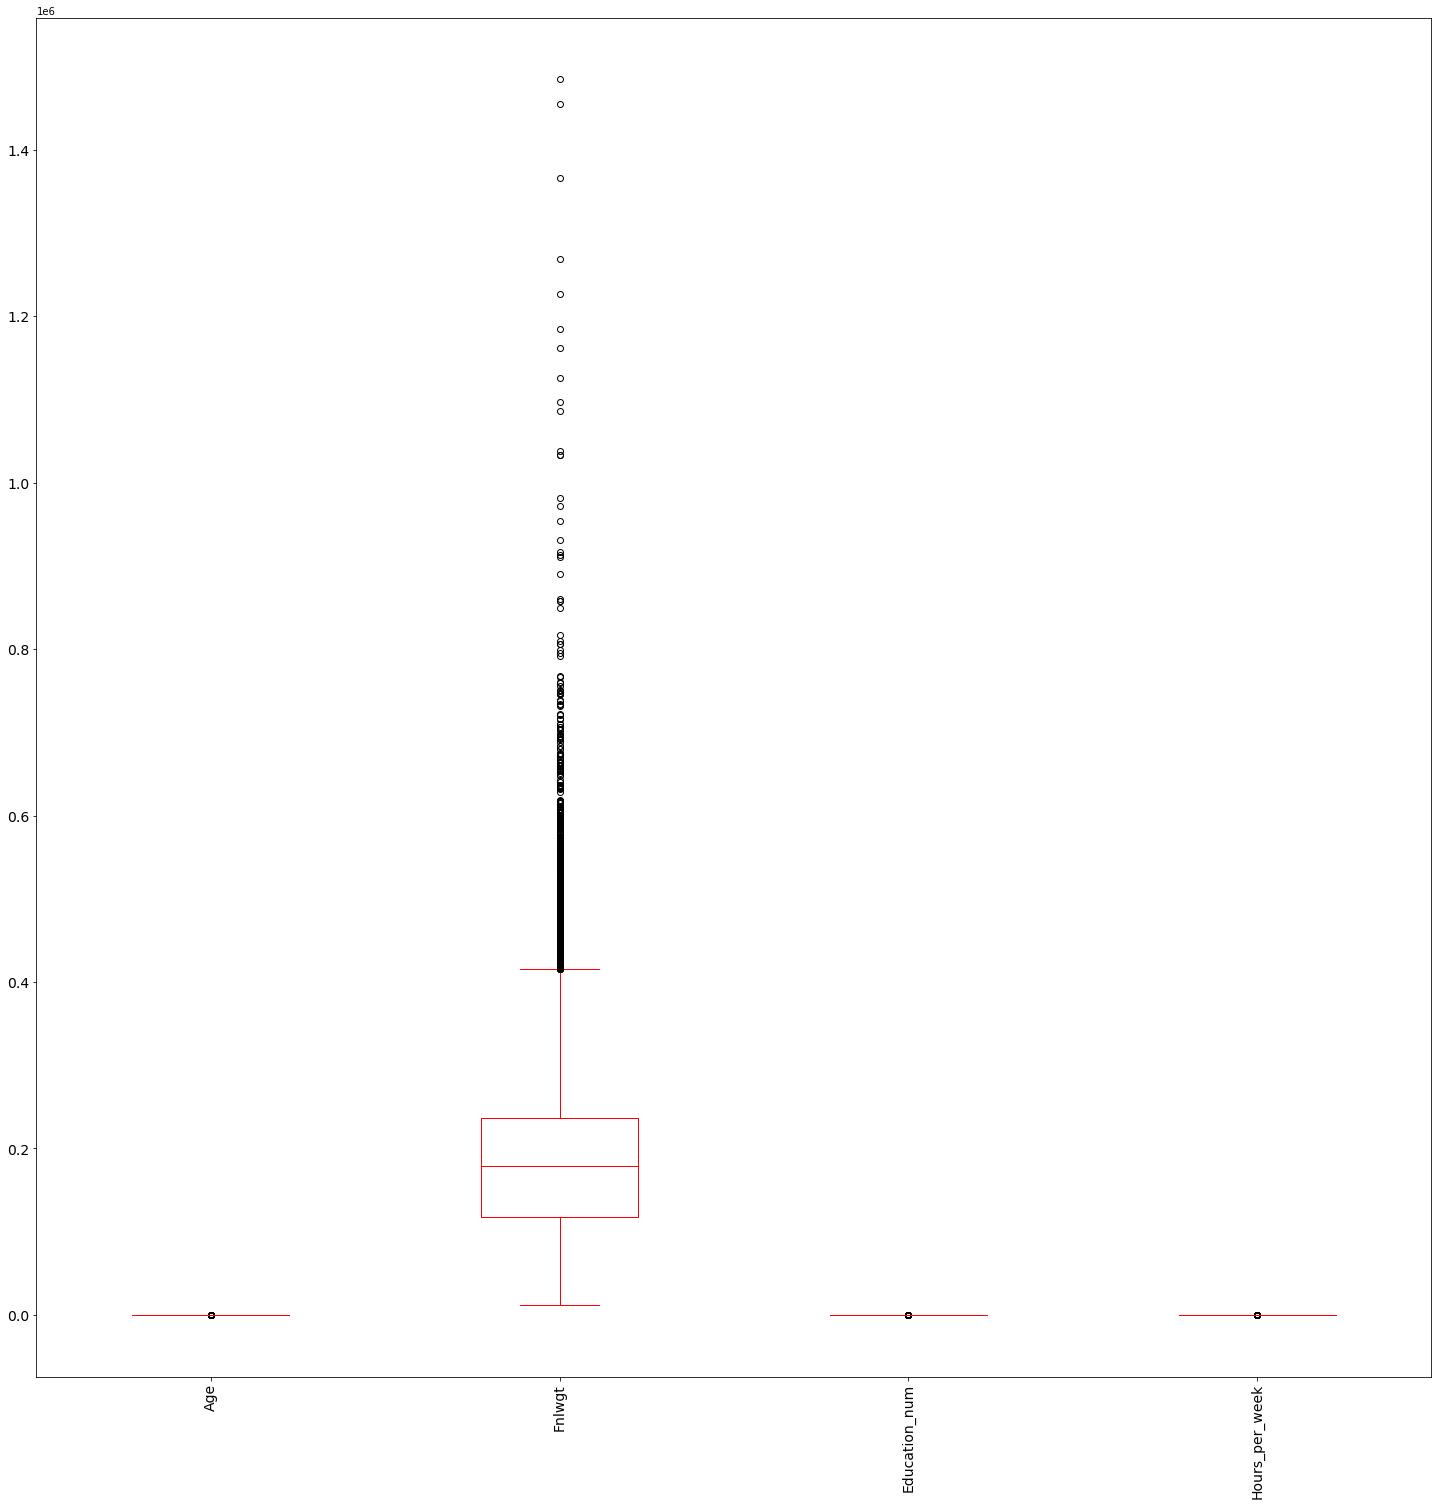

In [39]:
df1.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

# Removing Outliers

In [43]:
#Taking all the column names with outliers as a list
dfoutliers=df1[["Age","Fnlwgt","Education_num","Hours_per_week"]]

from scipy.stats import zscore
z=np.abs(zscore(dfoutliers))
df_new=df1[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [44]:
df1=df_new

In [45]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [46]:
dataloss=(32560-31461)/32560*100

In [47]:
dataloss

3.3753071253071254

# Skewness

In [48]:
df1.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [53]:
skew_cols=["Fnlwgt"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df1[skew_cols] = scaler.fit_transform(df1[skew_cols].values)

In [54]:
df1.skew()

Age               0.472279
Fnlwgt           -0.031770
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

# Label Encoding

In [55]:
df1.dtypes

Age                 int64
Workclass          object
Fnlwgt            float64
Education          object
Education_num       int64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

we have 10 object type variable columns, 4 int type variable columns.

In [56]:
le=LabelEncoder()
df1['Workclass']=le.fit_transform(df1['Workclass'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,3,0.426203,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,3,0.606321,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,3,1.488179,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,3,1.048361,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,3,-0.207700,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,3,-0.235382,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,3,0.287856,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [57]:
le=LabelEncoder()
df1['Education']=le.fit_transform(df1['Education'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,3,0.426203,10,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,3,0.606321,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,3,1.488179,8,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,3,1.048361,11,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,3,-0.207700,10,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,3,-0.235382,10,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,3,0.287856,10,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [58]:
le=LabelEncoder()
df1['Marital_status']=le.fit_transform(df1['Marital_status'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,3,0.426203,10,9,0,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,3,0.606321,1,7,2,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,3,1.488179,8,13,2,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,3,1.048361,11,14,2,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,3,-0.207700,10,9,2,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,3,-0.235382,10,9,6,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,3,0.287856,10,9,4,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [59]:
le=LabelEncoder()
df1['Occupation']=le.fit_transform(df1['Occupation'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,Husband,White,Male,13,United-States,<=50K
1,38,3,0.426203,10,9,0,5,Not-in-family,White,Male,40,United-States,<=50K
2,53,3,0.606321,1,7,2,5,Husband,Black,Male,40,United-States,<=50K
3,28,3,1.488179,8,13,2,10,Wife,Black,Female,40,Cuba,<=50K
4,37,3,1.048361,11,14,2,3,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,Wife,White,Female,38,United-States,<=50K
32556,40,3,-0.207700,10,9,2,6,Husband,White,Male,40,United-States,>50K
32557,58,3,-0.235382,10,9,6,0,Unmarried,White,Female,40,United-States,<=50K
32558,22,3,0.287856,10,9,4,0,Own-child,White,Male,20,United-States,<=50K


In [60]:
le=LabelEncoder()
df1['Relationship']=le.fit_transform(df1['Relationship'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,0,White,Male,13,United-States,<=50K
1,38,3,0.426203,10,9,0,5,1,White,Male,40,United-States,<=50K
2,53,3,0.606321,1,7,2,5,0,Black,Male,40,United-States,<=50K
3,28,3,1.488179,8,13,2,10,5,Black,Female,40,Cuba,<=50K
4,37,3,1.048361,11,14,2,3,5,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,White,Female,38,United-States,<=50K
32556,40,3,-0.207700,10,9,2,6,0,White,Male,40,United-States,>50K
32557,58,3,-0.235382,10,9,6,0,4,White,Female,40,United-States,<=50K
32558,22,3,0.287856,10,9,4,0,3,White,Male,20,United-States,<=50K


In [61]:
le=LabelEncoder()
df1['Race']=le.fit_transform(df1['Race'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,0,4,Male,13,United-States,<=50K
1,38,3,0.426203,10,9,0,5,1,4,Male,40,United-States,<=50K
2,53,3,0.606321,1,7,2,5,0,2,Male,40,United-States,<=50K
3,28,3,1.488179,8,13,2,10,5,2,Female,40,Cuba,<=50K
4,37,3,1.048361,11,14,2,3,5,4,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,4,Female,38,United-States,<=50K
32556,40,3,-0.207700,10,9,2,6,0,4,Male,40,United-States,>50K
32557,58,3,-0.235382,10,9,6,0,4,4,Female,40,United-States,<=50K
32558,22,3,0.287856,10,9,4,0,3,4,Male,20,United-States,<=50K


In [62]:
le=LabelEncoder()
df1['Sex']=le.fit_transform(df1['Sex'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,0,4,1,13,United-States,<=50K
1,38,3,0.426203,10,9,0,5,1,4,1,40,United-States,<=50K
2,53,3,0.606321,1,7,2,5,0,2,1,40,United-States,<=50K
3,28,3,1.488179,8,13,2,10,5,2,0,40,Cuba,<=50K
4,37,3,1.048361,11,14,2,3,5,4,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,4,0,38,United-States,<=50K
32556,40,3,-0.207700,10,9,2,6,0,4,1,40,United-States,>50K
32557,58,3,-0.235382,10,9,6,0,4,4,0,40,United-States,<=50K
32558,22,3,0.287856,10,9,4,0,3,4,1,20,United-States,<=50K


In [63]:
le=LabelEncoder()
df1['Native_country']=le.fit_transform(df1['Native_country'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,0,4,1,13,39,<=50K
1,38,3,0.426203,10,9,0,5,1,4,1,40,39,<=50K
2,53,3,0.606321,1,7,2,5,0,2,1,40,39,<=50K
3,28,3,1.488179,8,13,2,10,5,2,0,40,4,<=50K
4,37,3,1.048361,11,14,2,3,5,4,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,4,0,38,39,<=50K
32556,40,3,-0.207700,10,9,2,6,0,4,1,40,39,>50K
32557,58,3,-0.235382,10,9,6,0,4,4,0,40,39,<=50K
32558,22,3,0.287856,10,9,4,0,3,4,1,20,39,<=50K


In [64]:
le=LabelEncoder()
df1['Income']=le.fit_transform(df1['Income'])
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.112845,8,13,2,3,0,4,1,13,39,0
1,38,3,0.426203,10,9,0,5,1,4,1,40,39,0
2,53,3,0.606321,1,7,2,5,0,2,1,40,39,0
3,28,3,1.488179,8,13,2,10,5,2,0,40,4,0
4,37,3,1.048361,11,14,2,3,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,4,0,38,39,0
32556,40,3,-0.207700,10,9,2,6,0,4,1,40,39,1
32557,58,3,-0.235382,10,9,6,0,4,4,0,40,39,0
32558,22,3,0.287856,10,9,4,0,3,4,1,20,39,0


In [65]:
df1.dtypes

Age                 int64
Workclass           int32
Fnlwgt            float64
Education           int32
Education_num       int64
Marital_status      int32
Occupation          int32
Relationship        int32
Race                int32
Sex                 int32
Hours_per_week      int64
Native_country      int32
Income              int32
dtype: object

We encoded all categorical values to int type.

# Correlation

In [66]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066534,-0.000447,0.053361,-0.286424,0.001946,-0.268028,0.030679,0.091664,0.097510,-0.000310,0.248351
Workclass,0.038024,1.000000,-0.021640,0.004652,0.003831,-0.020597,0.006426,-0.056825,0.046295,0.070095,0.030311,-0.002131,0.003494
Fnlwgt,-0.066534,-0.021640,1.000000,-0.024200,-0.033154,0.027735,0.002084,0.008285,-0.008319,0.025312,-0.015562,-0.063290,-0.004595
Education,-0.000447,0.004652,-0.024200,1.000000,0.356040,-0.039094,-0.032604,-0.015121,0.015552,-0.024911,0.061325,0.070323,0.077526
Education_num,0.053361,0.003831,-0.033154,0.356040,1.000000,-0.065568,0.098277,-0.102497,0.030849,0.016662,0.160483,0.051438,0.337595
Marital_status,-0.286424,-0.020597,0.027735,-0.039094,-0.065568,1.000000,0.028015,0.185772,-0.067546,-0.127375,-0.197532,-0.019650,-0.198475
Occupation,0.001946,0.006426,0.002084,-0.032604,0.098277,0.028015,1.000000,-0.043123,-0.000541,0.048611,-0.008645,-0.002163,0.048110
Relationship,-0.268028,-0.056825,0.008285,-0.015121,-0.102497,0.185772,-0.043123,1.000000,-0.115216,-0.582940,-0.263412,-0.010318,-0.251506
Race,0.030679,0.046295,-0.008319,0.015552,0.030849,-0.067546,-0.000541,-0.115216,1.000000,0.088642,0.045331,0.133886,0.072451
Sex,0.091664,0.070095,0.025312,-0.024911,0.016662,-0.127375,0.048611,-0.582940,0.088642,1.000000,0.239039,-0.000418,0.216665


<AxesSubplot:>

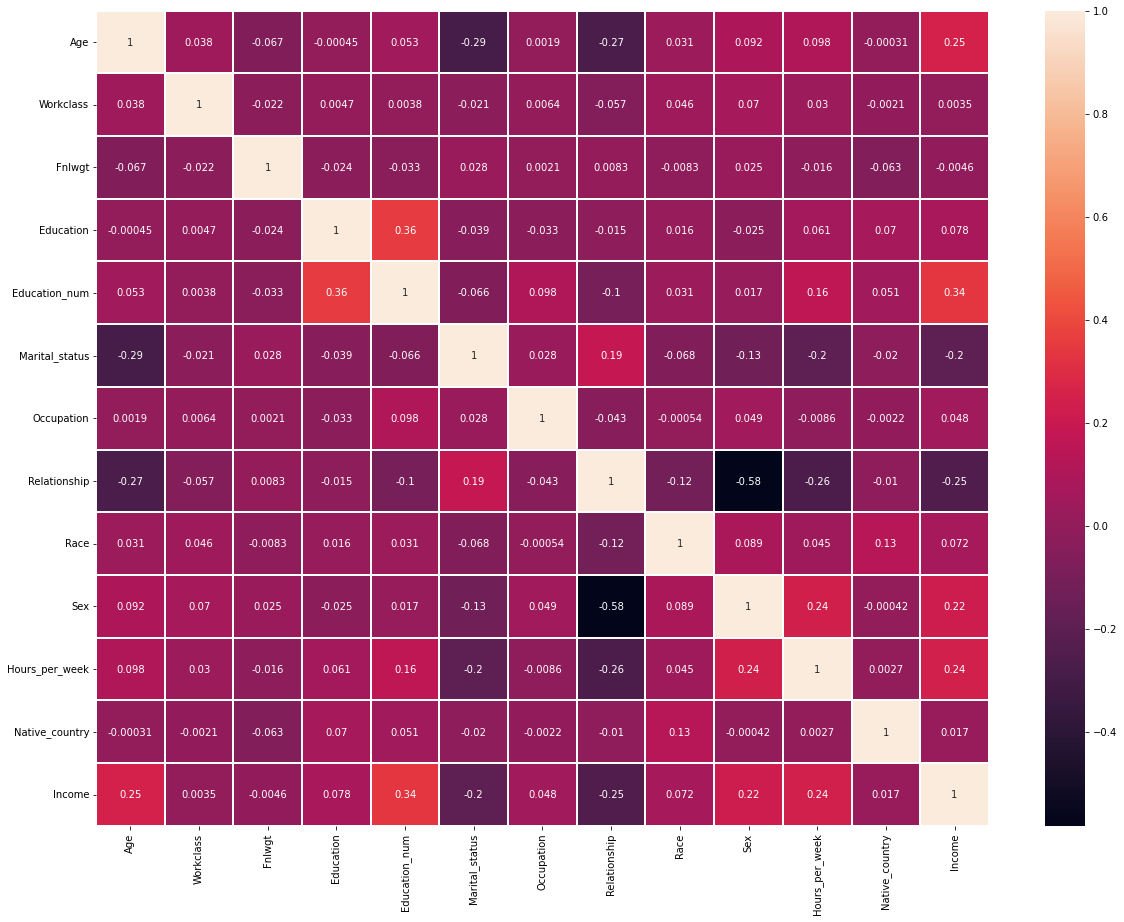

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=.1,annot=True)

By looking into the heat map i can say that there is no multicolinearity issue.

Workclass and Fnlwgt has very less correlation with target.

Native_country, Occupation, Race and Education has less correlation with target column.

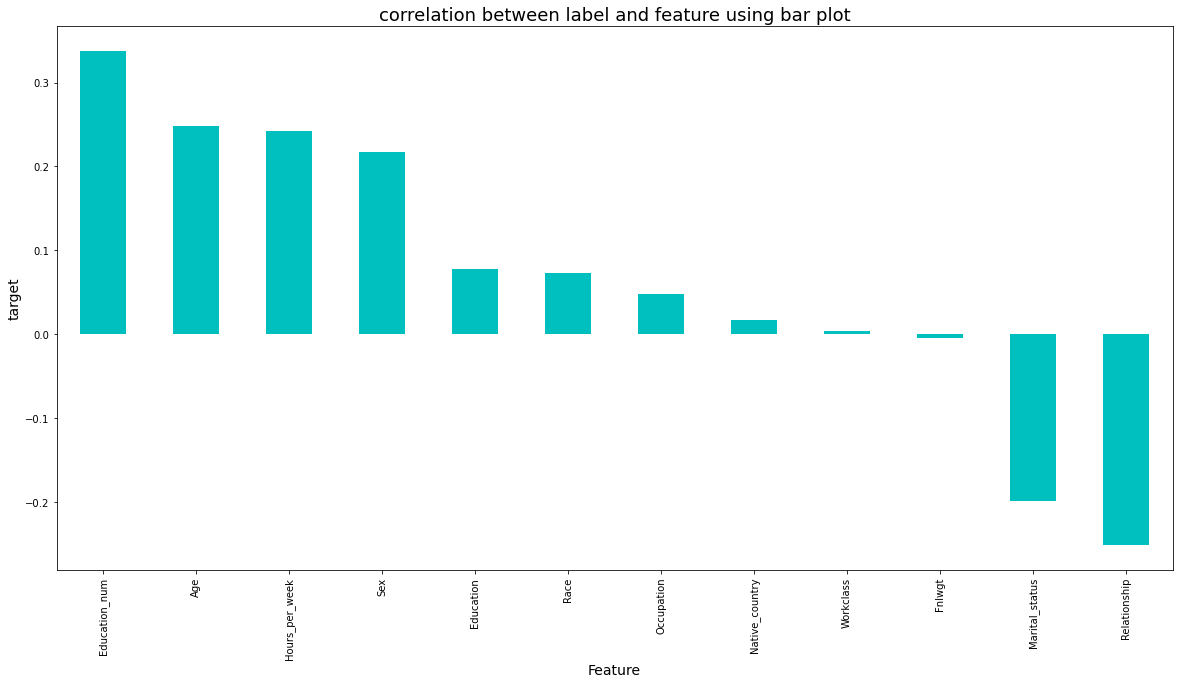

In [68]:
plt.figure(figsize=(20,10))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column.

# Splitting dataset into two parts: Input and Target variable

In [70]:
x=df1.drop('Income',axis=1)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,-1.112845,8,13,2,3,0,4,1,13,39
1,38,3,0.426203,10,9,0,5,1,4,1,40,39
2,53,3,0.606321,1,7,2,5,0,2,1,40,39
3,28,3,1.488179,8,13,2,10,5,2,0,40,4
4,37,3,1.048361,11,14,2,3,5,4,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.811251,6,12,2,13,5,4,0,38,39
32556,40,3,-0.207700,10,9,2,6,0,4,1,40,39
32557,58,3,-0.235382,10,9,6,0,4,4,0,40,39
32558,22,3,0.287856,10,9,4,0,3,4,1,20,39


In [72]:
y=df1['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31461, dtype: int32

# SMOTE

# !pip install imblearn -- user

pip install imblearn

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31461, dtype: int32

In [75]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [76]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [77]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

Now we are managed dataset imbalance using SMOTE technique.

# Scaling

In [78]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [79]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.777014,1.808302,-1.182543,-0.419629,0.959568,-0.301321,-0.810894,-0.718167,0.372276,0.626539,-2.636379,0.265874
1,-0.174102,-0.028805,0.460951,0.230512,-0.645198,-1.822305,-0.351043,-0.100264,0.372276,0.626539,-0.154236,0.265874
2,1.014792,-0.028805,0.653293,-2.695123,-1.447581,-0.301321,-0.351043,-0.718167,-2.134049,0.626539,-0.154236,0.265874
3,-0.966698,-0.028805,1.594998,-0.419629,0.959568,-0.301321,0.798585,2.371348,-2.134049,-1.596071,-0.154236,-5.395440
4,-0.253361,-0.028805,1.125332,0.555583,1.360760,-0.301321,-0.810894,2.371348,0.372276,-1.596071,-0.154236,0.265874
...,...,...,...,...,...,...,...,...,...,...,...,...
47701,2.045167,1.808302,1.928966,-0.094558,1.761952,-0.301321,1.028511,-0.718167,0.372276,0.626539,-1.533204,0.265874
47702,-0.174102,-0.028805,0.197314,-0.744700,0.157185,-0.301321,-0.580969,-0.718167,0.372276,0.626539,0.673145,0.265874
47703,0.301456,-0.028805,-0.794804,0.555583,1.360760,-1.822305,-0.810894,-0.100264,0.372276,-1.596071,-0.154236,0.265874
47704,-0.649659,-0.028805,1.740694,0.555583,1.360760,-0.301321,-0.810894,-0.718167,0.372276,0.626539,-0.154236,0.265874


# Finding Best Random State

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.7562185578535495  on Random_state  115


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Creating train_test_split

In [82]:
x_train.shape

(33394, 12)

In [83]:
y_train.shape

(33394,)

In [84]:
x_test.shape

(14312, 12)

In [85]:
y_test.shape

(14312,)

# Logistic Regression

In [86]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 75.62185578535495
[[5192 1940]
 [1549 5631]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      7132
           1       0.74      0.78      0.76      7180

    accuracy                           0.76     14312
   macro avg       0.76      0.76      0.76     14312
weighted avg       0.76      0.76      0.76     14312



In [87]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.7475161517070993


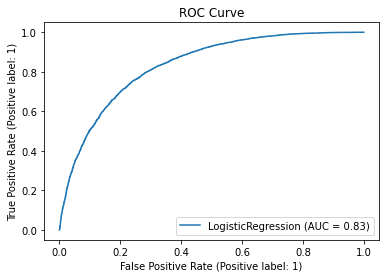

In [88]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

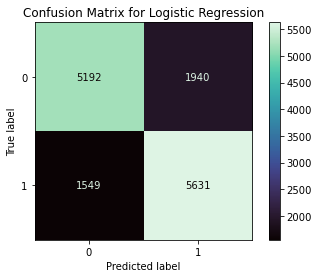

In [89]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier

In [90]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 81.37227501397429
[[5702 1430]
 [1236 5944]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7132
           1       0.81      0.83      0.82      7180

    accuracy                           0.81     14312
   macro avg       0.81      0.81      0.81     14312
weighted avg       0.81      0.81      0.81     14312



In [91]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.8192478792505581


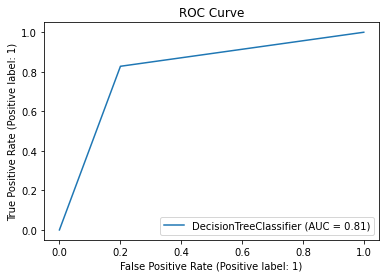

In [92]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

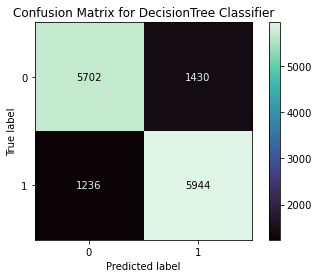

In [93]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# KNeighbors Classifier

In [94]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 83.42649524874231
[[5566 1566]
 [ 806 6374]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7132
           1       0.80      0.89      0.84      7180

    accuracy                           0.83     14312
   macro avg       0.84      0.83      0.83     14312
weighted avg       0.84      0.83      0.83     14312



In [95]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.8375681113782871


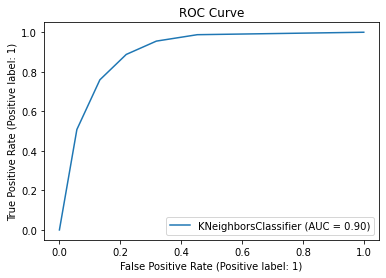

In [96]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

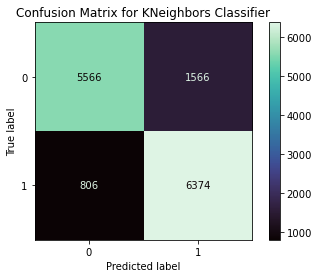

In [97]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector Classifier

In [98]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 82.7976523197317
[[5431 1701]
 [ 761 6419]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      7132
           1       0.79      0.89      0.84      7180

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



In [100]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.824991167090959


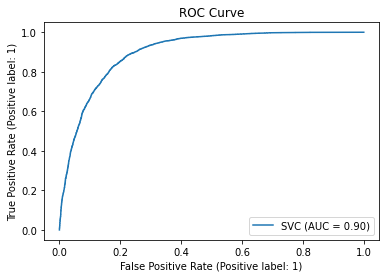

In [101]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sv, x_test, y_test)
plt.title("ROC Curve")
plt.show()

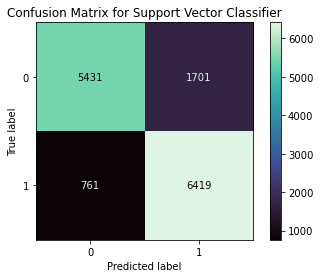

In [102]:
metrics.plot_confusion_matrix(sv, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Ensemble Technique

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)  # testing accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 87.24147568474008
[[6020 1112]
 [ 714 6466]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7132
           1       0.85      0.90      0.88      7180

    accuracy                           0.87     14312
   macro avg       0.87      0.87      0.87     14312
weighted avg       0.87      0.87      0.87     14312



In [104]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.8745450291191075


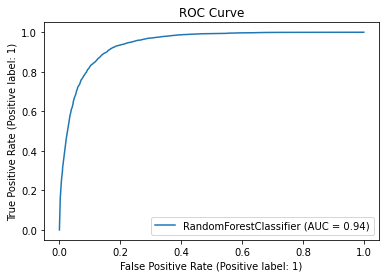

In [105]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

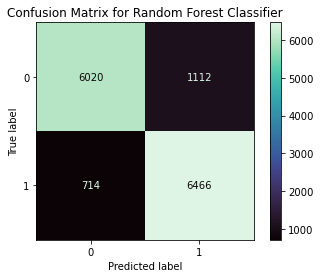

In [106]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [107]:
RandomForestClassifier()

RandomForestClassifier()

In [108]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [109]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [111]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [112]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [113]:
RandomForestClassifier()

RandomForestClassifier()

In [114]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)

In [115]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8283258803801006

# Saving the final model

In [116]:
import joblib

joblib.dump(rf,'Censusmodel.obj')

Census_loadmodel=joblib.load('Censusmodel.obj')
Census_loadmodel.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [117]:
conclusion=pd.DataFrame([Census_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,1,1,0,1,1,0,0,1,0,0,...,1,1,1,0,1,0,0,1,0,0
Original,1,1,0,1,1,0,0,1,0,0,...,1,1,1,0,1,0,0,1,0,0
